SHAP values shape: (200, 2)


The figure layout has changed to tight


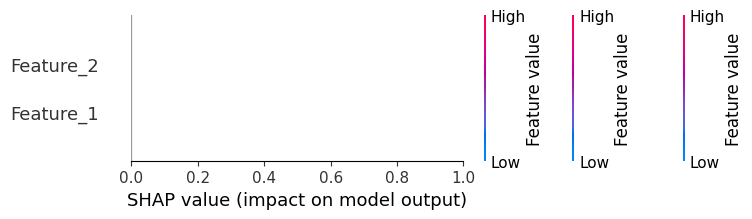

Sensitivity Ratios:
{'Feature_1': 1.848897570931429, 'Feature_2': -2.881960415840659}


<Figure size 640x480 with 0 Axes>

In [3]:
import numpy as np
import pandas as pd
import shap
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.use('Agg')

# Ensure plots are displayed correctly in Jupyter Notebook
%matplotlib inline

# Step 1: Generate demo data
np.random.seed(0)
n_samples = 200
X = pd.DataFrame({
    'Feature_1': np.random.normal(loc=0, scale=1, size=n_samples),
    'Feature_2': np.random.normal(loc=0, scale=1, size=n_samples)
})
y = 2 * X['Feature_1'] - 3 * X['Feature_2'] + np.random.normal(loc=0, scale=0.5, size=n_samples)

# Step 2: Train a model
model = RandomForestRegressor()
model.fit(X, y)

# Step 3: Calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Step 4: Visualize with Beeswarm Plot
# Check if shap_values is correctly formatted
print(f"SHAP values shape: {shap_values.shape}")

# Ensure feature names are passed to the plot
shap.summary_plot(shap_values, X, plot_type="beeswarm")
plt.savefig("SHAP_Demo.png", dpi=300)

# Step 5: Calculate Sensitivity Ratios
def calculate_sensitivity_ratio(shap_values, feature_values):
    pos_idx = shap_values > 0
    neg_idx = shap_values < 0
    mean_shap_pos = np.mean(shap_values[pos_idx])
    mean_shap_neg = np.mean(shap_values[neg_idx])
    mean_x_pos = np.mean(feature_values[pos_idx])
    mean_x_neg = np.mean(feature_values[neg_idx])
    sr = (mean_shap_pos - mean_shap_neg) / (mean_x_pos - mean_x_neg)
    return sr

sensitivity_ratios = {
    'Feature_1': calculate_sensitivity_ratio(shap_values[:, 0], X['Feature_1']),
    'Feature_2': calculate_sensitivity_ratio(shap_values[:, 1], X['Feature_2'])
}

# Step 6: Compare Results
print("Sensitivity Ratios:")
print(sensitivity_ratios)

# Step 7: Interpretation
# Describe how these SRs relate to the beeswarm plot
